In [1]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

# %matplotlib inline
%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')

from figFcns_nb import *

# O aproximácii prevodovej charakteristiky lineárnym modelom



Máme nameranú prevodovú charakteristiku, dáta sú uložené v súbore:

In [2]:
prevodChar = np.loadtxt('misc/dataRepo/prevodChar.csv')

Nakreslime ju:

<IPython.core.display.Javascript object>


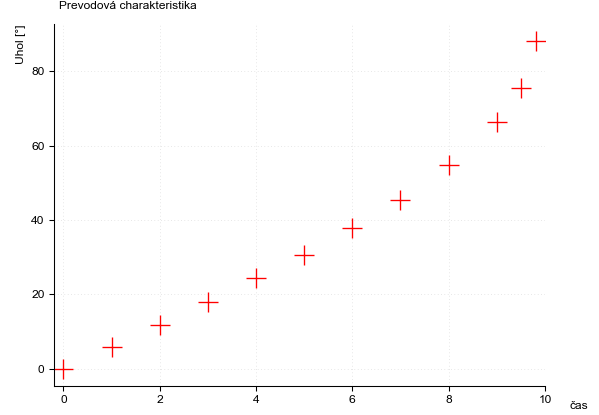

In [3]:
# Obrazok
figNameNum = 4
execfile('misc/figsc_03.py')

Body prevodovej charakteristiky zodpovedajú istej vlastnosi reálneho systému (reálne existujúceho systému). Zodpovedajú závislosti výstupu systému od vstupu systému, samozrejme v ustálenom stave. Nameraných je však len niekoľko bodov. V týchto bodoch je daná vlastnosť systému známa. Čo však v prípade ak by bolo potrebné poznať danú vlastnosť mimo nameraných bodov? Teda mimo hodnôt vstupu, pre ktoré bola prevodová charakteristika nameraná.

Aj pre tieto účely je výhodné využiť model. Model reálnej vlastnosti systému. Samotnej vlastnosti systému zodpovedá nameraná závislosť (prevodová charakteristika). Aproximáciou tejto závislosti je možné získať model.

Model nech je v tomto prípade matematický vzťah, funkčná závislosť, istý predpis... Ak hodnota na vstupe modelu bude rovnaká ako hodnota na vstupe reálneho systému, potom hodnota na výstupe modelu nech je „približne rovnaká“ ako hodnota reálna. Toto nech však platí pre všetky namerané body prevodovej charakteristiky. Teda model nech sa pripližne zhoduje s reálnymi dátami. Ak toto platí v nameraných bodoch, potom to, zrejme, platí aj v iných bodoch. Platí to pre akúkoľvek hodnotu na vstupe modelu - že výstup modelu sa približne zhoduje s reálnym výstupom systému.

Takto všeobecne opísaný model možno skonkretizovať napríklad nasledovne: Nech modelom je polynomiálna funkcia

$$
    \hat y = \Theta_3 u^3 + \Theta_2 u^2 + \Theta_1 u + \Theta_0
$$

kde „vstup“ je $u$ a „výstup modelu“ je $\hat y$. Parametrami modelu sú koeficienty (čísla) $\Theta_3$, $\Theta_2$, $\Theta_1$ a $\Theta_0$.

Mimochodom, ide o lineárny model. Parametre modelu sú v lineárnom vzťahu k „signálom“ modelu (k vstupom modelu).


Ak by sme na vstup modelu priviedli hodnotu zodpovedajúcu prvému bodu prevodovej charakteristiky (súradnice bodu označme $[u_1, y_1]$) potom na výstupe modelu by bola hodnota, ktorú označme $\hat y_1$. Presnejšie napísané:

$$
    \hat y_1 = \Theta_3 u_1^3 + \Theta_2 u_1^2 + \Theta_1 u_1 + \Theta_0
$$


Pre druhý bod prevodovej charakteristiky by to bolo

$$
    \hat y_2 = \Theta_3 u_2^3 + \Theta_2 u_2^2 + \Theta_1 u_2 + \Theta_0
$$

...atď.

Samozrejme, model má v každom prípade len jednu sadu parametrov: $\Theta_3$, $\Theta_2$, $\Theta_1$ a $\Theta_0$. Tie, samozrejme, ostávajú rovnaké bez ohľadu na to aký je vstup modelu.




Model má aproximovať reálne dáta (reálnu vlastnosť systému). Odchýlky medzi modelom a dátami v jednotlivých nameraných bodoch sú:


$$
\begin{align}
    e_1 &= y_1 - \hat y_1 \\
    e_2 &= y_2 - \hat y_2 \\
    e_3 &= y_3 - \hat y_3 \\
    &\vdots
\end{align}
$$

Odchýlky teda sú $e_1$, $e_2$, atď.

Za $\hat y_i$, pre $i = 1,\ldots,N$, možno dosadiť vyššie uvedené, teda

$$
\begin{align}
    e_1 &= y_1 - \Theta_3 u_1^3 + \Theta_2 u_1^2 + \Theta_1 u_1 + \Theta_0 \\
    e_2 &= y_2 - \Theta_3 u_2^3 + \Theta_2 u_2^2 + \Theta_1 u_2 + \Theta_0 \\
    e_3 &= y_3 - \Theta_3 u_3^3 + \Theta_2 u_3^2 + \Theta_1 u_3 + \Theta_0 \\
    &\vdots \\
    e_N &= y_N - \Theta_3 u_N^3 + \Theta_2 u_N^2 + \Theta_1 u_N + \Theta_0 
\end{align}
$$

Ak by sa model presne zhodoval s dátami, potom by platilo

$$
\begin{align}
    e_1 &= 0 \\
    &\vdots \\
    e_N &= 0
\end{align}
$$

Toto by však bol úplne ideálny prípad a dá sa tušiť, že takýto prípad nenastane.

Akokoľvek, čo sa týka číselných hodnôt $e_i$ považujme ich na chvýľku za známe, také, že sú nulové. Potom práve vznikla sústava rovníc. Ich počet je $N$. Neznáme v rovniciach sú $\Theta_3$, $\Theta_2$, $\Theta_1$ a $\Theta_0$, teda 4 neznáme. Všetko ostatné je v rovniciach známe, teda známe sú $e_i$, $y_i$ aj $u_i$. V tomto prípade, počet rovníc je väčší ako počet neznámich. To je veľmi dôležité, avšak prečo je to dôležité je ďaľšia vec čo začína byť nad rámec tohto textu.

Uvedená sústava rovníc sa dá zapísať maticovo:

$$
\begin{bmatrix} 
    0 \\ 0 \\\vdots \\ 0
\end{bmatrix}
=
\begin{bmatrix} 
    y_1 \\ y_2 \\\vdots \\ y_N
\end{bmatrix}
-
\begin{bmatrix} 
    u_1^3 & u_1^2 & u_1 & 1 \\
    u_2^3 & u_2^2 & u_2 & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    u_N^3 & u_N^2 & u_N & 1 
\end{bmatrix}
\begin{bmatrix} 
    \Theta_3 \\ \Theta_2 \\ \Theta_1 \\ \Theta_0
\end{bmatrix}
$$

Pre zjednodušenie zaveďme označenia:

$$
0 = y - H \Theta
$$

kde je snáď zrejmé čo je čo. Inak zapísané:

$$
H \Theta = y 
$$

Toto je (pri predpoklade o vyššom počte rovníc ako je neznámych) sústava rovníc, ktorú je možné riešiť v zmysle metódy najmenších štvorcov (kvadrátov). Podrobnosti sú ďaleko praďaleko nad rámec tohto textu. Výsledkom však je, že vektor $y$ a vektor $H \Theta$ (áno je to vektor) sa „rovnajú“ v takom zmysle, že suma kvadrátov odchýlok medzi ich súradnicami je minimálna možná. Inak, a užitočnejšie, povedané, $y - H \Theta$ je vlastne $e$. Vektor $e$ obsahuje všetky odchýlky medzi modelom a nameranými dátami. Vekor $e$ sú ale aj odchýlky medzi súradnicami vektorom, o ktorých sme práve hovorili. A suma kvadrátov týchto odchýlok je minimálna! Takže aj suma odchýlok medzi modelom a dátami je minimálna!

Uviedli sme, že uvedenú sústavu je možné riešiť. Neuviedli sme však ako. Neznámou je (vektor) $\Theta$. A tento možno (pri uvedených aj neuvedených predpokladoch) vypočítať nasledovne:

$$
\Theta = \left( H^\mathsf T H \right)^{-1} H^\mathsf T y 
$$






Aplikujme teraz vyššie uvedené.

In [4]:
H = np.hstack([
        (prevodChar[:,0].reshape(-1,1))**3,    
        (prevodChar[:,0].reshape(-1,1))**2,
        prevodChar[:,0].reshape(-1,1),
        np.ones([prevodChar[:,0].shape[0],1]),
        ])


y = prevodChar[:,1].reshape(-1,1)

theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(H.T, H)), H.T), y)

# ---------------------
print 'matica H je:\n'
print H

print '\n'

print 'vektor y je:\n'
print y

print '\n'

print 'vypocitane parametre \Theta su:\n'
print theta

matica H je:

[[   0.          0.          0.          1.      ]
 [   1.          1.          1.          1.      ]
 [   8.          4.          2.          1.      ]
 [  27.          9.          3.          1.      ]
 [  64.         16.          4.          1.      ]
 [ 125.         25.          5.          1.      ]
 [ 216.         36.          6.          1.      ]
 [ 343.         49.          7.          1.      ]
 [ 512.         64.          8.          1.      ]
 [ 729.         81.          9.          1.      ]
 [ 857.375      90.25        9.5         1.      ]
 [ 944.076141   96.2361      9.81        1.      ]]


vektor y je:

[[ -0.17610703]
 [  5.89561614]
 [ 11.81642556]
 [ 18.03326617]
 [ 24.29880817]
 [ 30.63939463]
 [ 37.89511347]
 [ 45.50633381]
 [ 54.69179566]
 [ 66.36753503]
 [ 75.57189887]
 [ 88.27213892]]


vypocitane parametre \Theta su:

[[ 0.11151888]
 [-1.13336502]
 [ 9.05583353]
 [-1.32700934]]


Pripomeňme, že model systému je

$$
    \hat y = \Theta_3 u^3 + \Theta_2 u^2 + \Theta_1 u + \Theta_0
$$

Ak by sme do modelu postupne dosádzali všetky namerané vstupy $u_i$, dostávali by sme výstupy modelu $\hat y_i$, teda

$$
\begin{align}
    \hat y_1 &= \Theta_3 u_1^3 + \Theta_2 u_1^2 + \Theta_1 u_1 + \Theta_0 \\
    \hat y_2 &= \Theta_3 u_2^3 + \Theta_2 u_2^2 + \Theta_1 u_2 + \Theta_0 \\
    &\vdots \\
    \hat y_N &= \Theta_3 u_N^3 + \Theta_2 u_N^2 + \Theta_1 u_N + \Theta_0 
\end{align}
$$

Maticovo zapísané to predsa je:

$$
\hat y = H \Theta 
$$

kde samozrejme teraz je $\hat y$ ako vektor...

Teda výstupy modelu pre dané namerané vstupy budú:

In [5]:
y_model = np.matmul(H,theta)

print 'vystup modelu pre dane (namerane) vstupy:\n'
print y_model

vystup modelu pre dane (namerane) vstupy:

[[ -1.32700934]
 [  6.70697804]
 [ 13.14334865]
 [ 18.65121572]
 [ 23.89969252]
 [ 29.5578923 ]
 [ 36.29492833]
 [ 44.77991385]
 [ 55.68196213]
 [ 69.67018642]
 [ 78.03071246]
 [ 83.72239831]]


Znázornime do grafu:

<IPython.core.display.Javascript object>


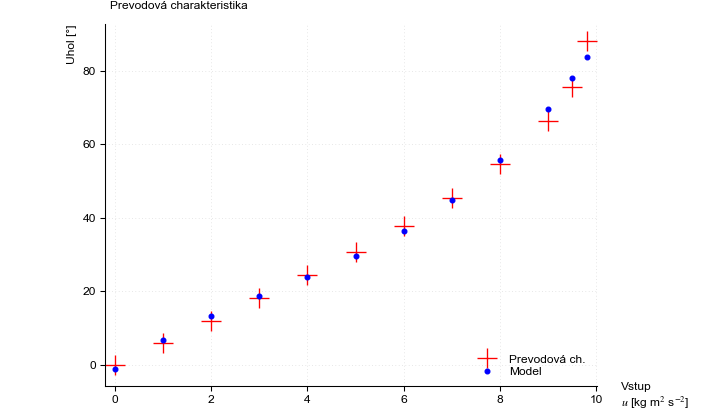

In [6]:
# Obrazok
figNameNum = 5
execfile('misc/figsc_04.py')

Model aproximuje dáta.

Model však možno použiť aj na nájdenie výstupov pre akékoľvek vstupné hodnoty, nie len pre tie, pri ktorých sa meralo. Nech nás zaujímajú výstupy modelu pre tieto vstupné hodnoty:

In [7]:
u_ine = np.arange(0,9.81,0.1).reshape(-1,1)

Vypočítajme (postupne po jednom) výstupy modelu, a zapíšme si ich:

In [8]:
y_model = np.zeros(u_ine.shape)
for idx in range(u_ine.shape[0]):
    y_model[idx,0] = ((u_ine[idx,0]**3) * theta[0]) + ((u_ine[idx,0]**2) * theta[1]) + ((u_ine[idx,0]**1) * theta[2])  + ((u_ine[idx,0]**0) * theta[3])

Nakreslime (závislosť `y_model` od `u_ine`)

<IPython.core.display.Javascript object>


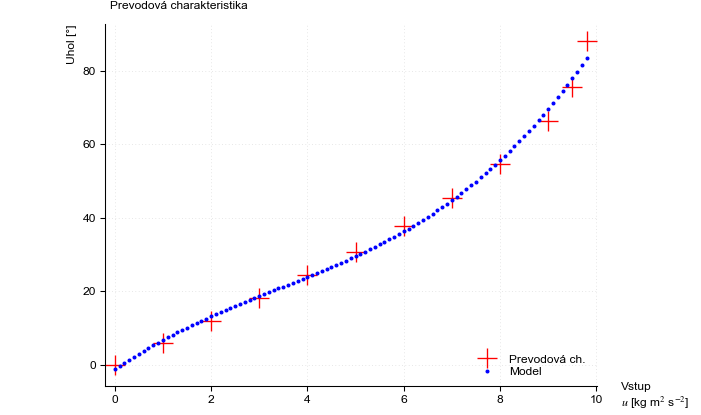

In [9]:
# Obrazok
figNameNum = 6
execfile('misc/figsc_05.py')

Výstup modelu aproximuje dáta...

Odložme si parametre modelu, ktoré sme práve našli:

In [10]:
print theta
np.savetxt('misc/dataRepo/theta_poly3order.csv', theta)

[[ 0.11151888]
 [-1.13336502]
 [ 9.05583353]
 [-1.32700934]]


Milý čitateľ, vedeli by ste vyrobiť iné lineárne modeli?